In [2]:
import numpy as np

data_path = "training/datasets"
data = np.load(f"{data_path}/pathmnist_128.npz")

test_images = data['test_images']
test_labels = data['test_labels']

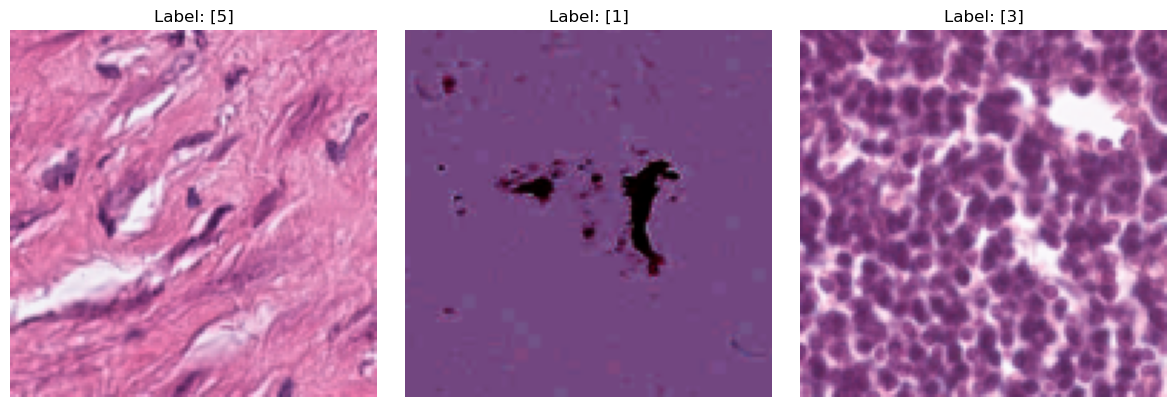

Saved 3 images to experiment_images/


In [5]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Create folder
os.makedirs("experiment_images", exist_ok=True)

# Get 3 random indices
random_indices = random.sample(range(len(test_images)), 3)

# Save and display the images
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, idx in enumerate(random_indices):
    img = test_images[idx]
    label = test_labels[idx]
    
    # Save
    pil_img = Image.fromarray(img)
    pil_img.save(f"experiment_images/image_{i}_label_{label}.png")
    
    # Display
    axes[i].imshow(img)
    axes[i].set_title(f'Label: {label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()
print(f"Saved 3 images to experiment_images/")

In [20]:
import numpy as np
import torch
import torch.nn as nn
from torchvision import transforms, models
from PIL import Image

def classify_colon(image_path):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model = models.resnet18(weights=None)
    model.fc = nn.Sequential(
        nn.Dropout(0.1),
        nn.Linear(512, 9)
    )    
    
    model.load_state_dict(torch.load('training/models/model_epoch_13.pt'))
    model = model.to(device)

    transform = transforms.Compose([
        transforms.Resize((128, 128)),
        transforms.ToTensor(), # convert to tensor
        transforms.Normalize((0.7405, 0.5330, 0.7058), (0.1237, 0.1768, 0.1244))
    ])

    img = Image.open(image_path)
    img_tensor = transform(img).unsqueeze(0).to(device)  # Add batch dimension

    # Inference
    model.eval()
    with torch.no_grad():
        output = model(img_tensor)

    class_names = [
        "Adipose",
        "Background",
        "Debris",
        "Lymphocytes",
        "Mucus",
        "Smooth Muscle",
        "Normal Colon Mucosa",
        "Cancer-associated Stroma",
        "Colorectal Adenocarcinoma Epithelium"
    ]


    predicted_class = output.argmax(dim=1).item()
    return class_names[predicted_class]

In [25]:
print(classify_colon('experiment_images/image_2_label_[3].png'))

Lymphocytes


C:\Users\mamou\AppData\Local\Temp\ipykernel_13828\878707099.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('training/models/model_epoc